In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import re

## Find phrase counts for 'climate change', 'global warming', and 'greenhouse gases'

In [3]:
articles = pd.read_csv('/Users/meghajain/Desktop/all_articles.csv', index_col=0)

In [157]:
articles.columns

Index(['Date', 'Source', 'Body', 'Event Type'], dtype='object')

#### Pre-processing: removing missing values, cleaning date, finding counts of the phrases

In [8]:
tampa = re.compile(r'\s*Tampa Tribune \(Florida\)\s*')
articles['Date'] = articles['Date'].apply(lambda x: re.sub(tampa, '', str(x)))

In [11]:
articles = articles[~((articles['Body'].isnull()) | (articles['Date'].isnull()))]

In [9]:
articles['Date'] = pd.to_datetime(articles['Date'])

In [19]:
articles.loc[articles['Event Type'] == 'Flood', 'Event Type'] = 'Flooding'

In [13]:
climate = re.compile(r'[C|c]limate change')

In [71]:
articles["Climate_mention"] = articles['Body'].apply(lambda x: 1 if len(re.findall(climate, str(x))) > 0 else 0)
articles["Climate_mention"].value_counts()

0    105927
1      2271
Name: Climate_mention, dtype: int64

In [72]:
warming = re.compile(r'[G|g]lobal warming')
articles["Warming_mention"] = articles['Body'].apply(lambda x: 1 if len(re.findall(warming, str(x))) > 0 else 0)
articles["Warming_mention"].value_counts()

0    105916
1      2282
Name: Warming_mention, dtype: int64

In [17]:
environmental = re.compile(r'[C|c]limate change|[G|g]lobal warming|[G|g]reenhouse gasses')
articles["Related count"] = articles['Body'].apply(lambda x: len(re.findall(environmental, str(x))))
articles["Related count"].value_counts()

0     113931
1       1571
2        705
3        427
4        359
5        261
6        181
7        155
8        123
9         95
10        71
11        56
12        49
13        35
16        19
17        18
14        15
15        14
19         8
20         6
18         4
23         4
24         3
31         3
22         2
28         2
34         1
21         1
27         1
35         1
Name: Related count, dtype: int64

In [18]:
articles.loc[articles['Related count'] > 0, 'Mentioned?'] = 1

In [69]:
articles[articles['Mentioned?'] == 1].to_csv('/Users/meghajain/Desktop/climatementions.csv')

In [20]:
len(articles)

118121

In [220]:
articles.columns

Index(['Date', 'Source', 'Body', 'Event Type', 'Length', 'Climate count',
       'Warming count', 'GHG count', 'Related count', 'Mentioned?'],
      dtype='object')

In [21]:
articles.drop_duplicates(subset=['Body', 'Date'], inplace=True)

## Articles by date

In [73]:
articles_bydate = articles.copy(deep=True)

In [74]:
articles_bydate.set_index(keys=articles_bydate['Date'], inplace=True)

In [75]:
articles_bydategrouped = articles_bydate.groupby(by=pd.TimeGrouper(freq='A'))

In [76]:
articles_bydate_df = pd.DataFrame({'All_freq': articles_bydategrouped['Mentioned?'].sum()/articles_bydategrouped.size(), 'Climate_freq': articles_bydategrouped['Climate_mention'].sum()/articles_bydategrouped.size(), 'Warming_freq': articles_bydategrouped['Warming_mention'].sum()/articles_bydategrouped.size()}).reset_index()

In [77]:
articles_bydate_df.set_index(keys=articles_bydate_df['Date'], inplace=True)

In [79]:
articles_bydate_df.to_csv("/Users/meghajain/Desktop/count_bydate.csv")

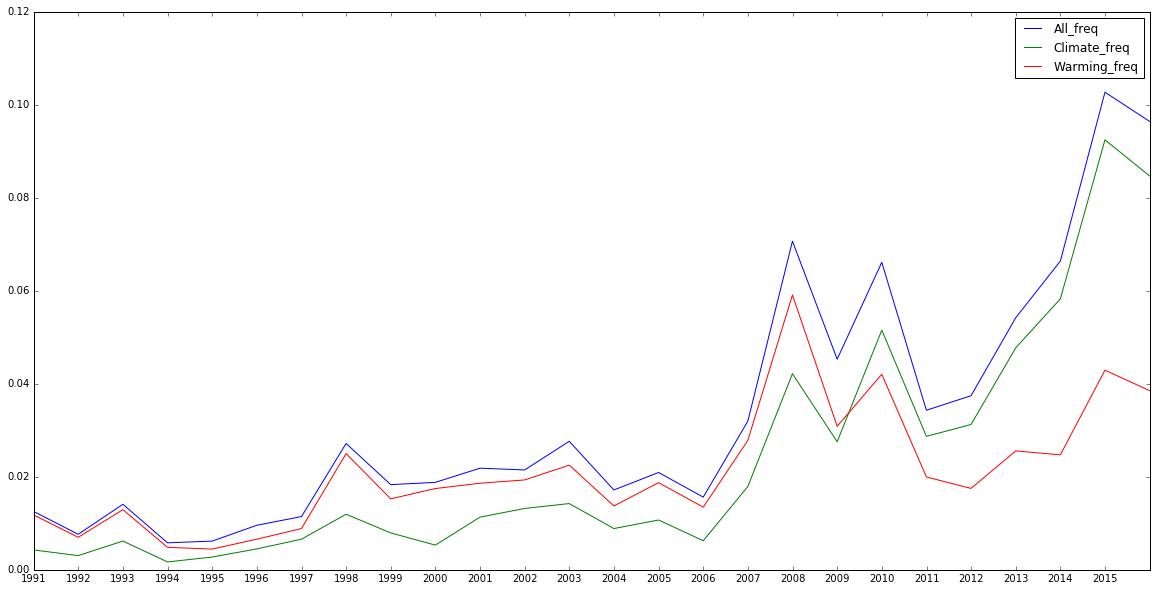

In [78]:
import matplotlib.dates as dates

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.plot(articles_bydate_df['All_freq'])
ax.plot(articles_bydate_df['Climate_freq'])
ax.plot(articles_bydate_df['Warming_freq'])
plt.legend()

# ax.xaxis.set_minor_locator(dates.MonthLocator(interval=3))
ax.xaxis.set_major_locator(dates.YearLocator())

## By event and date

In [83]:
articles_byeventdate = articles_bydate.groupby(by=['Event Type', pd.TimeGrouper(freq='A')])

In [84]:
articles_byeventdate['Related count'].sum()/articles_byeventdate['Length'].sum()

Event Type  Date      
Drought     1990-12-31    0.000089
            1991-12-31    0.000025
            1992-12-31    0.000145
            1993-12-31    0.000030
            1994-12-31    0.000080
            1995-12-31    0.000058
            1996-12-31    0.000104
            1997-12-31    0.000301
            1998-12-31    0.000254
            1999-12-31    0.000185
            2000-12-31    0.000183
            2001-12-31    0.000314
            2002-12-31    0.000171
            2003-12-31    0.000127
            2004-12-31    0.000195
            2005-12-31    0.000169
            2006-12-31    0.000504
            2007-12-31    0.000937
            2008-12-31    0.000455
            2009-12-31    0.000764
            2010-12-31    0.000662
            2011-12-31    0.000432
            2012-12-31    0.000488
            2013-12-31    0.000665
            2014-12-31    0.001037
            2015-12-31    0.000723
Flooding    1990-12-31    0.000047
            1991-12-31    0.0000

In [120]:
articles_byeventdatedf = pd.DataFrame({'All_Freq': articles_byeventdate['Related count'].sum()/articles_byeventdate.size(), 'Climate_Freq': articles_byeventdate['Climate_mention'].sum()/articles_byeventdate.size(), 'Warming_freq': articles_byeventdate['Warming_mention'].sum()/articles_byeventdate.size()}).reset_index()

In [86]:
articles_byeventdatedf.to_csv("/Users/meghajain/Desktop/freq_byevent.csv")

In [105]:
articles_byeventdatedf.head()

,Event Type,Date,All_Freq,Climate_freq,Warming_freq
0,Drought,1990-12-31,0.000089,0.000010,0.000024
1,Drought,1991-12-31,0.000025,0.000005,0.000007
2,Drought,1992-12-31,0.000145,0.000018,0.000024
3,Drought,1993-12-31,0.000030,0.000004,0.000010
4,Drought,1994-12-31,0.000080,0.000006,0.000009


In [121]:
articles_byeventdatedf.rename(columns={'Climate_Freq': "Climate_freq", 'All_Freq': 'All_freq'},inplace=True)

## Data for visualization

In [122]:
# articles_bydate_df.drop(labels=['Date'],axis=1,inplace=True)
articles_forviz = articles_bydate_df.reset_index()
articles_forviz.head()

,Date,All_freq,Climate_freq,Warming_freq
0,1990-12-31,0.012560,0.004270,0.011806
1,1991-12-31,0.007640,0.003056,0.006985
2,1992-12-31,0.014093,0.006178,0.012934
3,1993-12-31,0.005799,0.001691,0.004832
4,1994-12-31,0.006169,0.002742,0.004455


In [123]:
len(articles_forviz), len(articles_byeventdatedf)

(26, 104)

In [124]:
articles_forviz = pd.concat(objs=[articles_forviz, articles_byeventdatedf], ignore_index=True)

In [125]:
len(articles_forviz)

130

In [126]:
articles_forviz.loc[articles_forviz['Event Type'].isnull(), 'Event Type'] = 'All'

In [127]:
articles_forviz.head()

,All_freq,Climate_freq,Date,Event Type,Warming_freq
0,0.012560,0.004270,1990-12-31,All,0.011806
1,0.007640,0.003056,1991-12-31,All,0.006985
2,0.014093,0.006178,1992-12-31,All,0.012934
3,0.005799,0.001691,1993-12-31,All,0.004832
4,0.006169,0.002742,1994-12-31,All,0.004455


In [128]:
articles_forviz.to_csv('/Users/meghajain/Desktop/freq_byevent.csv')

## Data exploration
#### Looking at how the mentions vary by event type

In [28]:
drought_byeventdate = articles_byeventdatedf[articles_byeventdatedf['Event Type'] == 'Drought']

In [30]:
drought_byeventdate.set_index('Date',inplace=True)

In [32]:
hurricane_byeventdate = articles_byeventdatedf[articles_byeventdatedf['Event Type'] == 'Hurricane']
hurricane_byeventdate.set_index('Date',inplace=True)

In [33]:
tornado_byeventdate = articles_byeventdatedf[articles_byeventdatedf['Event Type'] == 'Tornado']
tornado_byeventdate.set_index('Date',inplace=True)

In [34]:
flooding_byeventdate = articles_byeventdatedf[articles_byeventdatedf['Event Type'] == 'Flooding']
flooding_byeventdate.set_index('Date',inplace=True)

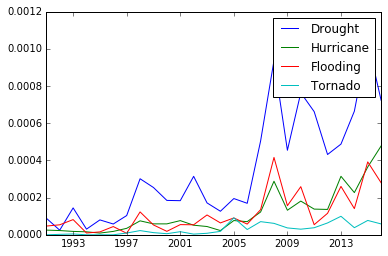

In [36]:
plt.plot(drought_byeventdate['All_Freq'],label='Drought')
plt.plot(hurricane_byeventdate['All_Freq'],label='Hurricane')
plt.plot(flooding_byeventdate['All_Freq'],label='Flooding')
plt.plot(tornado_byeventdate['All_Freq'],label='Tornado')
plt.legend()

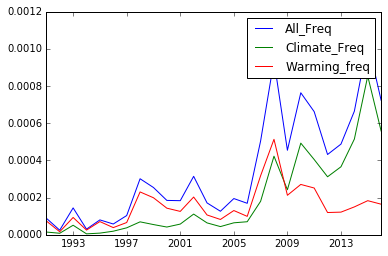

In [39]:
plt.plot(drought_byeventdate['All_Freq'])
plt.plot(drought_byeventdate['Climate_Freq'])
plt.plot(drought_byeventdate['Warming_freq'])
plt.legend()

#### Looking at how the mentions vary by source

In [129]:
articles_bysource = articles_bydate.groupby(by=['Source'])

In [132]:
articles_bysourcedf = pd.DataFrame({'All_freq': articles_bysource['Related count'].sum()/articles_bysource.size(), 'Climate_freq': articles_bysource['Climate count'].sum()/articles_bysource.size(), 'Warming_freq': articles_bysource['Warming count'].sum()/articles_bysource.size()})

In [137]:
articles_bysourcedf.sort_values('Climate_freq', ascending=False)

,All_freq,Climate_freq,Warming_freq
Source,,,
Boston Globe,0.272358,0.133775,0.138156
Des Moines Register,0.138701,0.095850,0.042625
USA Today,0.151304,0.079442,0.071862
LA Times,0.149970,0.075644,0.074251
Foxnews.com,0.078880,0.046438,0.031807
Arizona Republic,0.065654,0.045076,0.020333
Chicago Tribune,0.072474,0.037167,0.035307
The Tampa Tribune,0.049803,0.031503,0.018300
NY Times,0.054655,0.030814,0.023840


In [52]:
articles_bysourcedate = articles_bydate.groupby(by=['Source',pd.TimeGrouper(freq='A')])

In [139]:
articles_bysourcedatedf = pd.DataFrame({'All_Freq': articles_bysourcedate['Related count'].sum()/articles_bysourcedate['Length'].sum(), 'Climate_Freq': articles_bysourcedate['Climate count'].sum()/articles_bysourcedate['Length'].sum(), 'Warming_Freq': articles_bysourcedate['Warming count'].sum()/articles_bysourcedate['Length'].sum()}).reset_index()

In [140]:
articles_bysourcedatedf.head()

,Source,Date,All_Freq,Climate_Freq,Warming_Freq
0,Arizona Republic,1999-12-31,0.000000,0.000000,0.000000
1,Arizona Republic,2000-12-31,0.000000,0.000000,0.000000
2,Arizona Republic,2001-12-31,0.000000,0.000000,0.000000
3,Arizona Republic,2002-12-31,0.000043,0.000026,0.000009
4,Arizona Republic,2003-12-31,0.000022,0.000007,0.000015


In [58]:
articles_bysourcedatedf.set_index('Date',inplace=True)

In [63]:
articles_bysourcedatedf['Source'].unique()

array(['Arizona Republic', 'Atlanta Journal-Constitution',
       'Austin Statesman', 'Boston Globe', 'Chicago Tribune',
       'Des Moines Register', 'Foxnews.com', 'LA Times', 'NY Times',
       'Tampa Bay Times', 'The Tampa Tribune', 'USA Today'], dtype=object)

In [141]:
pivot = articles_bysourcedatedf.pivot(index="Source", columns = "Date", values="All_Freq")

In [143]:
pivot.fillna(0, inplace=True)
pivot

Date,1990-12-31 00:00:00,1991-12-31 00:00:00,1992-12-31 00:00:00,1993-12-31 00:00:00,1994-12-31 00:00:00,1995-12-31 00:00:00,1996-12-31 00:00:00,1997-12-31 00:00:00,1998-12-31 00:00:00,1999-12-31 00:00:00,...,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00
Source,,,,,,,,,,,,,,,,,,,,,
Arizona Republic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000122,0.000244,0.000169,0.000047,0.000032,0.000035,0.000069,0.000169,0.000181,0.000668
Atlanta Journal-Constitution,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000142,0.000000,0.000007,...,0.000134,0.000278,0.000089,0.000052,0.000054,0.000021,0.000011,0.000045,0.000367,0.000516
Austin Statesman,0.000044,0.000027,0.000067,0.000008,0.000131,0.000050,0.000064,0.000091,0.000080,0.000034,...,0.000131,0.000740,0.000132,0.000183,0.000024,0.000080,0.000077,0.000119,0.000107,0.000137
Boston Globe,0.000169,0.000041,0.000146,0.000018,0.000098,0.000067,0.000048,0.000540,0.000229,0.000225,...,0.000422,0.001032,0.000458,0.000845,0.000400,0.000299,0.000763,0.000657,0.000856,0.000933
Chicago Tribune,0.000059,0.000023,0.000088,0.000016,0.000004,0.000020,0.000060,0.000153,0.000077,0.000063,...,0.000120,0.000534,0.000156,0.000540,0.000303,0.000231,0.000249,0.000133,0.000575,0.000357
Des Moines Register,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000144,...,0.000266,0.000340,0.000181,0.000285,0.000054,0.000180,0.000142,0.000092,0.000869,0.000702
Foxnews.com,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000021,0.000020,0.000407,0.000088,0.000188,0.000111
LA Times,0.000047,0.000027,0.000062,0.000023,0.000012,0.000032,0.000052,0.000142,0.000107,0.000099,...,0.000210,0.000535,0.000323,0.000600,0.000279,0.000403,0.000536,0.000487,0.000677,0.000653
NY Times,0.000000,0.000099,0.000000,0.000000,0.000000,0.000000,0.000007,0.000057,0.000134,0.000007,...,0.000070,0.000126,0.000060,0.000153,0.000000,0.000258,0.000068,0.000306,0.001436,0.001309


In [144]:
pivot.to_csv("/Users/meghajain/Desktop/freq_bysource.csv")

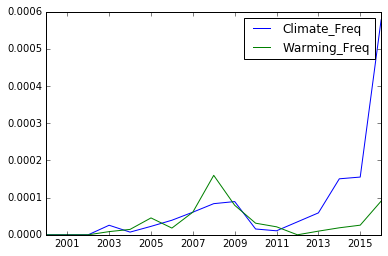

In [61]:
az = articles_bysourcedatedf[articles_bysourcedatedf['Source']=='Arizona Republic']
plt.plot(az['Climate_Freq'])
plt.plot(az['Warming_Freq'])
plt.legend()

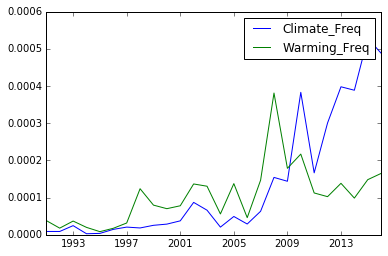

In [62]:
la = articles_bysourcedatedf[articles_bysourcedatedf['Source']=='LA Times']
plt.plot(la['Climate_Freq'])
plt.plot(la['Warming_Freq'])
plt.legend()

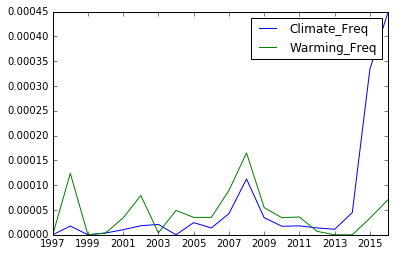

In [64]:
atl = articles_bysourcedatedf[articles_bysourcedatedf['Source']=='Atlanta Journal-Constitution']
plt.plot(atl['Climate_Freq'])
plt.plot(atl['Warming_Freq'])
plt.legend()

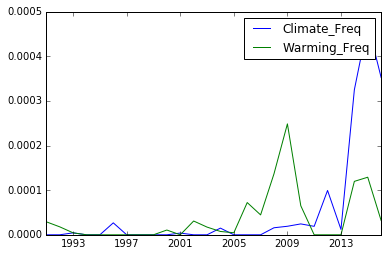

In [67]:
tamp = articles_bysourcedatedf[articles_bysourcedatedf['Source']=='Tampa Bay Times']
plt.plot(tamp['Climate_Freq'])
plt.plot(tamp['Warming_Freq'])
plt.legend()

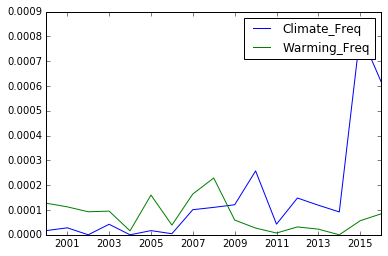

In [68]:
iowa = articles_bysourcedatedf[articles_bysourcedatedf['Source']=='Des Moines Register']
plt.plot(iowa['Climate_Freq'])
plt.plot(iowa['Warming_Freq'])
plt.legend()